In [15]:
# Load a 3D dose distrubution

In [16]:
path_to_file = "/media/luis/TOMO/Dosepy/Hombro20en1/RD_3D_arc1y2.dcm"

In [17]:
from Dosepy.image import load

#img = load(path_to_file)  # Shows an exception. Dosepy is intended for 2D dose distributions

SimpleITK should be a better approach to work with dose distributions and structures.

In [18]:
import SimpleITK as sitk

In [19]:
img = sitk.ReadImage(path_to_file, outputPixelType=sitk.sitkFloat64)

In [20]:
print(img.GetPixelIDValue())
print(img.GetPixelIDTypeAsString())
print(img.GetNumberOfComponentsPerPixel())

9
64-bit float
1


In [21]:
img.GetSize()

(102, 90, 60)

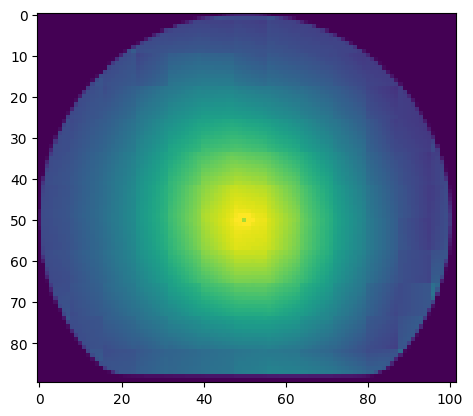

In [22]:
import matplotlib.pyplot as plt

plt.imshow(sitk.GetArrayViewFromImage(img[:,:,50]), vmax=12000)

In [23]:
import numpy as np

np.mean(sitk.GetArrayFromImage(img[50,:,:]))

np.float64(81198.36425925927)

(array([1892.,  430., 2106., 1435., 1077.,  745.,  576.,  444.,  334.,
         141.]),
 array([    0. ,  1233.3,  2466.6,  3699.9,  4933.2,  6166.5,  7399.8,
         8633.1,  9866.4, 11099.7, 12333. ]),
 <BarContainer object of 10 artists>)

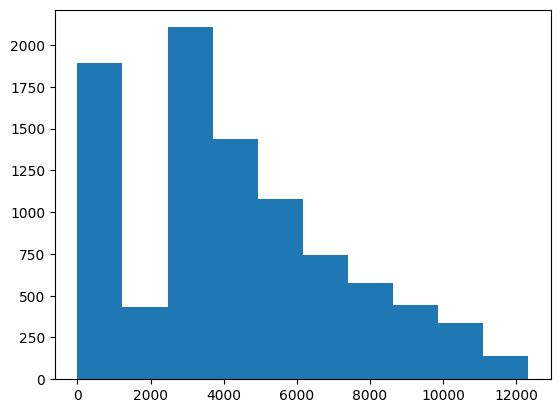

In [24]:
plt.hist(np.ravel(sitk.GetArrayFromImage(img[:,:,50])))

SimpleITK does not calculate the product with DoseGridScaling tag

In [25]:
#img.GetMetaData("DoseGridScaling")
img.GetMetaDataKeys()

('0008|0005',
 '0008|0012',
 '0008|0013',
 '0008|0016',
 '0008|0018',
 '0008|0020',
 '0008|0021',
 '0008|0023',
 '0008|0030',
 '0008|0031',
 '0008|0033',
 '0008|0050',
 '0008|0060',
 '0008|0070',
 '0008|0080',
 '0008|0090',
 '0008|1010',
 '0008|1030',
 '0008|103e',
 '0008|1040',
 '0008|1048',
 '0008|1070',
 '0008|1090',
 '0010|0010',
 '0010|0020',
 '0010|0030',
 '0010|0032',
 '0010|0040',
 '0018|0050',
 '0018|1000',
 '0018|1020',
 '0020|000d',
 '0020|000e',
 '0020|0010',
 '0020|0011',
 '0020|0032',
 '0020|0037',
 '0020|0052',
 '0020|1040',
 '0028|0002',
 '0028|0004',
 '0028|0008',
 '0028|0009',
 '0028|0010',
 '0028|0011',
 '0028|0030',
 '0028|0100',
 '0028|0101',
 '0028|0102',
 '0028|0103',
 '3004|0002',
 '3004|0004',
 '3004|000a',
 '3004|000c',
 '3004|000e',
 'ITK_original_direction',
 'ITK_original_spacing')

In [26]:
img.GetMetaData('3004|000e')

'1.296932754e-05 '

In [27]:
dose = img * float(img.GetMetaData('3004|000e'))

(array([3432., 3584., 1255.,  398.,  165.,   92.,   65.,   53.,   60.,
          76.]),
 array([ 0.        ,  1.34627586,  2.69255172,  4.03882757,  5.38510343,
         6.73137929,  8.07765515,  9.423931  , 10.77020686, 12.11648272,
        13.46275858]),
 <BarContainer object of 10 artists>)

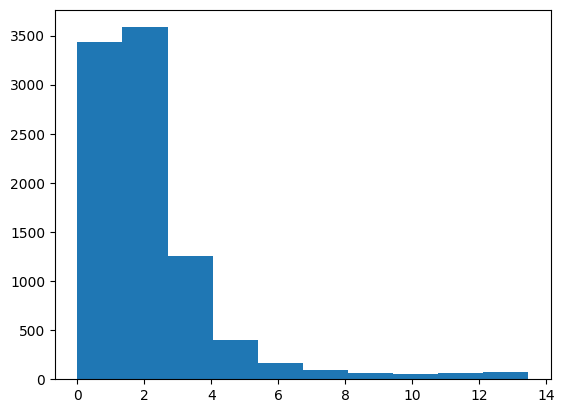

In [28]:
plt.hist(np.ravel(sitk.GetArrayFromImage(dose[:,:,30])))

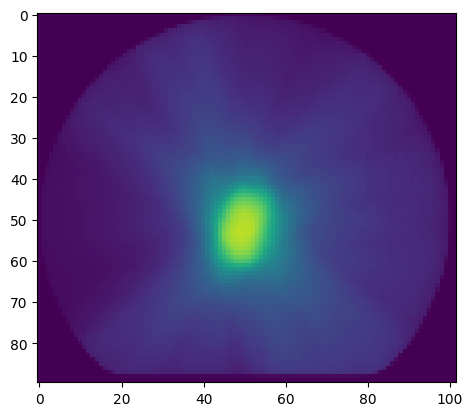

In [29]:
plt.imshow(sitk.GetArrayViewFromImage(dose[:,:,30]), vmax=15)

In [30]:
from pathlib import Path


def load(path_to_file: str | Path):
    """
    Load a dose distribution from a DICOM file.

    Parameters
    ----------
    path_to_file : str or Path
        The path to the DICOM file containing the dose distribution.

    Returns
    -------
    sitk.Image
        A SimpleITK image object representing the dose distribution.
        
    """

    # Check if the input is a string or Path object
    if not isinstance(path_to_file, (str, Path)):
        raise TypeError("path_to_file must be a string or a Path object.")

    # Convert str to Path if necessary
    if isinstance(path_to_file, str):
        path_to_file = Path(path_to_file)

    # Check if the file exists
    if not path_to_file.is_file():
        raise FileNotFoundError(f"The file {path_to_file} does not exist.")

    # Check if the file is DICOM file
    with open(path_to_file, "rb") as my_file:
        my_file.read(128)  # Skip first bytes

        if my_file.read(4) != b'DICM':
            print(f"{path_to_file} is not a valid dcm file.")
            raise ValueError(f"{path_to_file} is not a valid dcm file.")
        
        
    # Load the DICOM file using SimpleITK
    img = sitk.ReadImage(str(path_to_file), outputPixelType=sitk.sitkFloat64)

    # Check if the tag '3004|000e' exists in the metadata
    if not img.HasMetaDataKey('3004|000e'):
        raise ValueError(f"The DICOM file {path_to_file} does not contain the required metadata tag DoseGridScaling (3004|000e).")

    # Convert image to a dose distribution
    dose = img * float(img.GetMetaData('3004|000e'))

    return dose


In [31]:
with open(path_to_file, "rb") as my_file:
    my_file.read(128)
    print(my_file.read(4))

b'DICM'


In [32]:
load(path_to_file=path_to_file)

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x77e60824a9a0> >

In [33]:
# Check if path_to_file is an instance of Path
if isinstance(path_to_file, Path):
    print(f"{path_to_file} is a Path object.")

## Structures

In [1]:
import numpy as np
import pydicom

path_to_file = "/media/luis/TOMO/Dosepy/Hombro20en1/RS/RS.dcm"

In [6]:
dsS = pydicom.dcmread(path_to_file)

# Imprimir Nombre y número de ROI

for k in np.arange(0,len(dsS.StructureSetROISequence)):
	print(dsS.StructureSetROISequence[k].ROIName)
	print(dsS.StructureSetROISequence[k].ROINumber)

BODY
1
PTV_High
2
CouchSurface
3
CouchInterior
4


In [2]:
# Anonymize the information

import pydicom

output_file_name = "RS_anonymized.dcm"

ds_anonym = pydicom.dcmread(path_to_file)

name = "Anonymous"

ds_anonym.PatientName = name
ds_anonym.InstitutionName = name
ds_anonym.PhysiciansOfRecord = name
ds_anonym.PatientID = name
ds_anonym.PatientBirthDate = "20000101"

ds_anonym.save_as(output_file_name)

In [10]:
ds_anonym.PatientBirthDate

'19601031'

In [3]:
type(dsS)

pydicom.dataset.FileDataset

In [4]:
dsS.get("SOPClassUID")

'1.2.840.10008.5.1.4.1.1.481.3'

In [3]:
from Dosepy import bed

structure_names = bed.get_structures(path_to_file)
structure_names

{'BODY': 1, 'PTV_High': 2, 'CouchSurface': 3, 'CouchInterior': 4}

In [5]:
structure_names == {"BODY": 1, "PTV_High": 2, "CouchSurface": 3, "CouchInterior": 4}

True

In [6]:
path_to_dose = "/media/luis/TOMO/Dosepy/Hombro20en1/RD_3D_arc1y2.dcm"
incorrect_dicom = bed.get_structures(path_to_dose)

ValueError: /media/luis/TOMO/Dosepy/Hombro20en1/RD_3D_arc1y2.dcm is not a valid DICOM RTSTRUCT file.

In [23]:
contour_sequence = dsS.ROIContourSequence[1].ContourSequence
contour_sequence

<Sequence, length 1>

In [24]:
len(dsS.ROIContourSequence[1].ContourSequence)

1

In [25]:
len(contour_sequence)

1

In [37]:
dsS.ROIContourSequence[0].ContourSequence

<Sequence, length 119>

In [39]:
type(contour_sequence)

pydicom.sequence.Sequence

In [27]:
contour_sequence.count

<bound method Sequence.count of <Sequence, length 1>>

In [40]:
dsS.ROIContourSequence[0].ContourSequence[0].ContourData

[-60.5, -177.09, -59, -59.5, -177.66, -59, -58.5, -177.85, -59, -57.5, -177.9, -59, -56.5, -177.58, -59, -55.63, -177, -59, -55.5, -176.91, -59, -54.69, -176, -59, -54.5, -175.68, -59, -54.08, -175, -59, -53.97, -174, -59, -54.03, -173, -59, -54.28, -172, -59, -54.5, -171.75, -59, -55.08, -171, -59, -55.5, -170.58, -59, -56.38, -170, -59, -56.5, -169.91, -59, -57.5, -169.53, -59, -58.5, -169.56, -59, -59.5, -169.68, -59, -60, -170, -59, -60.5, -170.31, -59, -61.28, -171, -59, -61.5, -171.27, -59, -62.03, -172, -59, -62.28, -173, -59, -62.28, -174, -59, -62.09, -175, -59, -61.59, -176, -59, -61.5, -176.09, -59, -60.59, -177, -59]

In [32]:
index = 0
sequence = 0
for i in range(len(dsS.ROIContourSequence[index].ContourSequence)):
	contour_data = dsS.ROIContourSequence[index].ContourSequence[i].ContourData  # ROI for PTV correspond to 1
	npoints = dsS.ROIContourSequence[index].ContourSequence[i].NumberOfContourPoints
	print(len(contour_data))
	print(npoints)

	contour_data_array = np.array(contour_data).reshape(npoints,3)
	print(contour_data_array)
	sequence += 1

sequence


96
32
[[ -60.5  -177.09  -59.  ]
 [ -59.5  -177.66  -59.  ]
 [ -58.5  -177.85  -59.  ]
 [ -57.5  -177.9   -59.  ]
 [ -56.5  -177.58  -59.  ]
 [ -55.63 -177.    -59.  ]
 [ -55.5  -176.91  -59.  ]
 [ -54.69 -176.    -59.  ]
 [ -54.5  -175.68  -59.  ]
 [ -54.08 -175.    -59.  ]
 [ -53.97 -174.    -59.  ]
 [ -54.03 -173.    -59.  ]
 [ -54.28 -172.    -59.  ]
 [ -54.5  -171.75  -59.  ]
 [ -55.08 -171.    -59.  ]
 [ -55.5  -170.58  -59.  ]
 [ -56.38 -170.    -59.  ]
 [ -56.5  -169.91  -59.  ]
 [ -57.5  -169.53  -59.  ]
 [ -58.5  -169.56  -59.  ]
 [ -59.5  -169.68  -59.  ]
 [ -60.   -170.    -59.  ]
 [ -60.5  -170.31  -59.  ]
 [ -61.28 -171.    -59.  ]
 [ -61.5  -171.27  -59.  ]
 [ -62.03 -172.    -59.  ]
 [ -62.28 -173.    -59.  ]
 [ -62.28 -174.    -59.  ]
 [ -62.09 -175.    -59.  ]
 [ -61.59 -176.    -59.  ]
 [ -61.5  -176.09  -59.  ]
 [ -60.59 -177.    -59.  ]]
120
40
[[ -60.5  -178.09  -58.  ]
 [ -59.5  -178.43  -58.  ]
 [ -58.5  -178.66  -58.  ]
 [ -57.5  -178.56  -58.  ]
 [ -56.5  -178

119

In [3]:
from Dosepy.bed import get_structure_coordinates

coordinates = get_structure_coordinates(structure="BODY", path_to_file=path_to_file)

In [4]:
coordinates[coordinates[:, 2] == -59]

array([[ -60.5 , -177.09,  -59.  ],
       [ -59.5 , -177.66,  -59.  ],
       [ -58.5 , -177.85,  -59.  ],
       [ -57.5 , -177.9 ,  -59.  ],
       [ -56.5 , -177.58,  -59.  ],
       [ -55.63, -177.  ,  -59.  ],
       [ -55.5 , -176.91,  -59.  ],
       [ -54.69, -176.  ,  -59.  ],
       [ -54.5 , -175.68,  -59.  ],
       [ -54.08, -175.  ,  -59.  ],
       [ -53.97, -174.  ,  -59.  ],
       [ -54.03, -173.  ,  -59.  ],
       [ -54.28, -172.  ,  -59.  ],
       [ -54.5 , -171.75,  -59.  ],
       [ -55.08, -171.  ,  -59.  ],
       [ -55.5 , -170.58,  -59.  ],
       [ -56.38, -170.  ,  -59.  ],
       [ -56.5 , -169.91,  -59.  ],
       [ -57.5 , -169.53,  -59.  ],
       [ -58.5 , -169.56,  -59.  ],
       [ -59.5 , -169.68,  -59.  ],
       [ -60.  , -170.  ,  -59.  ],
       [ -60.5 , -170.31,  -59.  ],
       [ -61.28, -171.  ,  -59.  ],
       [ -61.5 , -171.27,  -59.  ],
       [ -62.03, -172.  ,  -59.  ],
       [ -62.28, -173.  ,  -59.  ],
       [ -62.28, -174.  ,  -

In [33]:
type(contour_data_array)

numpy.ndarray

In [ ]:
extract = sitk.ExtractImageFilter()
extract.SetIndex()

In [34]:
contour_data_array.shape

(42, 3)

(array([  0.,   0.,   0.,   0.,   0., 742.,   0.,   0.,   0.,   0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

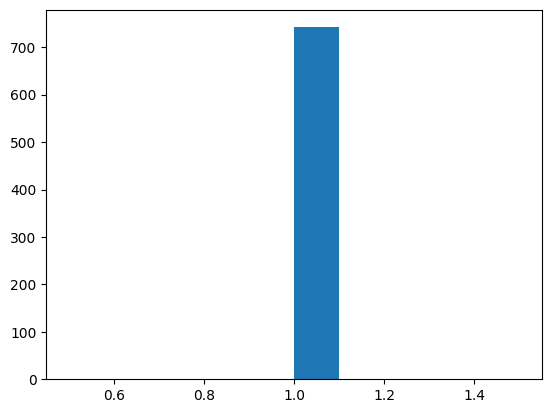

In [29]:
import matplotlib.pyplot as plt

plt.hist(contour_data_array[:, 2])

In [44]:
from matplotlib import path as PolyPath

polygon = PolyPath.Path(contour_data_array[:,:2])

In [45]:
import numpy as np

# Suppose your image has shape (rows, cols)
rows, cols = 256, 256

# Pixel spacing (row_spacing, col_spacing) in mm
spacing = (1.0, 1.0)

# Origin (x0, y0) in mm
origin = (0.0, 0.0)

# Generate index grids
y_indices, x_indices = np.meshgrid(np.arange(rows), np.arange(cols), indexing='ij')

# Convert indices to physical coordinates
x_physical = x_indices * spacing[1] + origin[1]
y_physical = y_indices * spacing[0] + origin[0]

# x_physical and y_physical now contain the physical coordinates for each pixel

In [46]:
x_physical

array([[  0.,   1.,   2., ..., 253., 254., 255.],
       [  0.,   1.,   2., ..., 253., 254., 255.],
       [  0.,   1.,   2., ..., 253., 254., 255.],
       ...,
       [  0.,   1.,   2., ..., 253., 254., 255.],
       [  0.,   1.,   2., ..., 253., 254., 255.],
       [  0.,   1.,   2., ..., 253., 254., 255.]], shape=(256, 256))

## Lectura de CT

In [9]:

import SimpleITK as sitk

# Load several ct files from a directory using SimpleITK

path_to_ct = "/media/luis/TOMO/Dosepy/Hombro20en1/CT"

reader = sitk.ImageSeriesReader()
series_file_names = {}
series_IDs = reader.GetGDCMSeriesIDs(path_to_ct)

In [10]:
# Check that we have at least one series
if series_IDs:
    for serie in series_IDs:
        series_file_names[serie] = reader.GetGDCMSeriesFileNames(
            path_to_ct, serie
        )

series_file_names

{'1.2.246.352.71.2.855512968882.250673.20250616082202': ('/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424270.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424269.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424268.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424267.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424266.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424265.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424264.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424263.20250616082647.dcm',
  '/media/luis/TOMO/Dosepy/Hombro20en1/CT/CT.1.2.246.352.71.3.855512968882.1424262.20250616082647.dcm',
  '/media

In [13]:
# Get slice number if we know the z coordinate

z = 1
slice_z = int((z - img.GetOrigin()[2]) / img.GetSpacing()[2])

print(f"{slice_z:}")


60


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

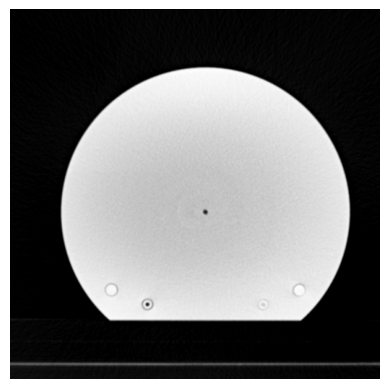

In [14]:
reader.SetFileNames(series_file_names[series_IDs[0]])
img = reader.Execute()
# Display the image slice from the middle of the stack, z axis
z = int(img.GetDepth() / 2)

import matplotlib.pyplot as plt

plt.imshow(sitk.GetArrayViewFromImage(img)[slice_z, :, :], cmap=plt.cm.Greys_r)
plt.axis("off")

In [51]:
print(img.GetOrigin())

print(img[:, :, z].GetOrigin())

(-127.75, -368.25, -59.0)
(-127.75, -368.25)


In [52]:
img.GetSpacing()

(0.5, 0.5, 1.0)

In [53]:
series_IDs

('1.2.246.352.71.2.855512968882.250673.20250616082202',)

In [54]:
#dsS

In [55]:
import numpy as np

contour = np.array([[1,2,3], [4,5,6], [7,8,9], [11,12,6]])

type(np.where(contour[:,2]==6))
type(np.where(contour[:,2]==6)[0])

numpy.ndarray

In [56]:
contour[:,2]==6

array([False,  True, False,  True])

In [57]:
np.where(contour[:,2]==6)

(array([1, 3]),)

In [58]:
contour[1, :2]

array([4, 5])

In [59]:
X, Y = np.meshgrid(np.linspace(2, 8, 6), np.linspace(3, 10, 7))
X

array([[2. , 3.2, 4.4, 5.6, 6.8, 8. ],
       [2. , 3.2, 4.4, 5.6, 6.8, 8. ],
       [2. , 3.2, 4.4, 5.6, 6.8, 8. ],
       [2. , 3.2, 4.4, 5.6, 6.8, 8. ],
       [2. , 3.2, 4.4, 5.6, 6.8, 8. ],
       [2. , 3.2, 4.4, 5.6, 6.8, 8. ],
       [2. , 3.2, 4.4, 5.6, 6.8, 8. ]])

In [60]:
X, Y = np.meshgrid(range(2,8+1), range(3,10+1))
X

array([[2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8]])

In [61]:
Y

array([[ 3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10]])

In [62]:
XY = np.dstack((X, Y))
XY

array([[[ 2,  3],
        [ 3,  3],
        [ 4,  3],
        [ 5,  3],
        [ 6,  3],
        [ 7,  3],
        [ 8,  3]],

       [[ 2,  4],
        [ 3,  4],
        [ 4,  4],
        [ 5,  4],
        [ 6,  4],
        [ 7,  4],
        [ 8,  4]],

       [[ 2,  5],
        [ 3,  5],
        [ 4,  5],
        [ 5,  5],
        [ 6,  5],
        [ 7,  5],
        [ 8,  5]],

       [[ 2,  6],
        [ 3,  6],
        [ 4,  6],
        [ 5,  6],
        [ 6,  6],
        [ 7,  6],
        [ 8,  6]],

       [[ 2,  7],
        [ 3,  7],
        [ 4,  7],
        [ 5,  7],
        [ 6,  7],
        [ 7,  7],
        [ 8,  7]],

       [[ 2,  8],
        [ 3,  8],
        [ 4,  8],
        [ 5,  8],
        [ 6,  8],
        [ 7,  8],
        [ 8,  8]],

       [[ 2,  9],
        [ 3,  9],
        [ 4,  9],
        [ 5,  9],
        [ 6,  9],
        [ 7,  9],
        [ 8,  9]],

       [[ 2, 10],
        [ 3, 10],
        [ 4, 10],
        [ 5, 10],
        [ 6, 10],
        [ 7, 1

In [63]:
XY_flat = XY.reshape((-1, 2))
XY_flat

array([[ 2,  3],
       [ 3,  3],
       [ 4,  3],
       [ 5,  3],
       [ 6,  3],
       [ 7,  3],
       [ 8,  3],
       [ 2,  4],
       [ 3,  4],
       [ 4,  4],
       [ 5,  4],
       [ 6,  4],
       [ 7,  4],
       [ 8,  4],
       [ 2,  5],
       [ 3,  5],
       [ 4,  5],
       [ 5,  5],
       [ 6,  5],
       [ 7,  5],
       [ 8,  5],
       [ 2,  6],
       [ 3,  6],
       [ 4,  6],
       [ 5,  6],
       [ 6,  6],
       [ 7,  6],
       [ 8,  6],
       [ 2,  7],
       [ 3,  7],
       [ 4,  7],
       [ 5,  7],
       [ 6,  7],
       [ 7,  7],
       [ 8,  7],
       [ 2,  8],
       [ 3,  8],
       [ 4,  8],
       [ 5,  8],
       [ 6,  8],
       [ 7,  8],
       [ 8,  8],
       [ 2,  9],
       [ 3,  9],
       [ 4,  9],
       [ 5,  9],
       [ 6,  9],
       [ 7,  9],
       [ 8,  9],
       [ 2, 10],
       [ 3, 10],
       [ 4, 10],
       [ 5, 10],
       [ 6, 10],
       [ 7, 10],
       [ 8, 10]])

## CT and Structure

In [15]:
z = 1
origin = img[:, :, z].GetOrigin()
origin

(-127.75, -368.25)

In [27]:
img.GetOrigin()

(-127.75, -368.25, -59.0)

In [65]:
img.GetSize()


(512, 512, 123)

In [72]:
img.GetSpacing()

(0.5, 0.5, 1.0)

[array([[  -2.5 , -325.15,    1.  ],
       [  -1.5 , -325.16,    1.  ],
       [  -0.5 , -325.16,    1.  ],
       ...,
       [  -4.5 , -324.91,    1.  ],
       [  -3.5 , -324.91,    1.  ],
       [  -3.13, -325.  ,    1.  ]], shape=(742, 3))]


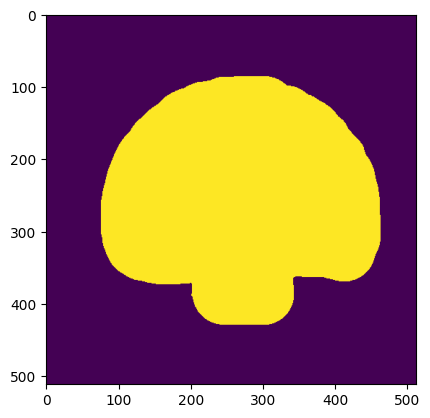

In [1]:
from skimage.draw import polygon
from Dosepy.bed import get_structure_coordinates
import numpy as np

contour_data_array = get_structure_coordinates("PTV_High", "/media/luis/TOMO/Dosepy/Hombro20en1/RS/RS.dcm")
print(contour_data_array)

import SimpleITK as sitk

# Load several ct files from a directory using SimpleITK

path_to_ct = "/media/luis/TOMO/Dosepy/Hombro20en1/CT"

reader = sitk.ImageSeriesReader()
series_file_names = {}
series_IDs = reader.GetGDCMSeriesIDs(path_to_ct)
# Check that we have at least one series
if series_IDs:
    for serie in series_IDs:
        series_file_names[serie] = reader.GetGDCMSeriesFileNames(
            path_to_ct, serie
        )
reader.SetFileNames(series_file_names[series_IDs[0]])
img = reader.Execute()

origin = img.GetOrigin()

# Vértices del polígono
r = contour_data_array[0][:, 1]
c = contour_data_array[0][:, 0]

# Vértices como índices
r_index = (r - origin[1])/img.GetSpacing()[1]
c_index = (c - origin[0])/img.GetSpacing()[0]

# Tamaño de la imagen
shape = (img.GetSize()[1], img.GetSize()[0])

# Obtener los índices de los píxeles dentro del polígono
rr, cc = polygon(r_index, c_index, shape=shape)

# Crear una máscara booleana
mask = np.zeros(shape)
mask[rr, cc] = 1

import matplotlib.pyplot as plt

plt.imshow(mask)

In [26]:
rr

array([378, 378, 378, 378, 379, 379, 379, 379, 379, 379, 379, 379, 380,
       380, 380, 380, 380, 380, 380, 380, 380, 380, 380, 380, 381, 381,
       381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 381, 382,
       382, 382, 382, 382, 382, 382, 382, 382, 382, 382, 382, 382, 382,
       382, 382, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383, 383,
       383, 383, 383, 383, 383, 383, 383, 384, 384, 384, 384, 384, 384,
       384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 385,
       385, 385, 385, 385, 385, 385, 385, 385, 385, 385, 385, 385, 385,
       385, 385, 385, 385, 385, 385, 386, 386, 386, 386, 386, 386, 386,
       386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386,
       387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387, 387,
       387, 387, 387, 387, 387, 387, 387, 388, 388, 388, 388, 388, 388,
       388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388,
       388, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 38

In [89]:
rr

array([ 76,  76,  76, ..., 462, 462, 462], shape=(100021,))

In [90]:
cc

array([257, 258, 259, ..., 312, 313, 314], shape=(100021,))

In [86]:
r_index

array([731.5 , 733.5 , 735.5 , 737.5 , 739.5 , 741.5 , 743.5 , 745.5 ,
       747.5 , 749.5 , 751.5 , 753.5 , 755.5 , 757.5 , 759.5 , 761.5 ,
       763.5 , 765.5 , 767.5 , 769.5 , 771.5 , 773.5 , 775.5 , 777.5 ,
       779.5 , 781.5 , 783.5 , 785.5 , 787.5 , 789.5 , 791.5 , 791.7 ,
       793.5 , 795.5 , 797.5 , 798.62, 799.5 , 801.5 , 803.04, 803.5 ,
       805.5 , 806.5 , 807.5 , 809.28, 809.5 , 811.5 , 811.84, 813.5 ,
       815.5 , 815.84, 817.5 , 819.5 , 821.5 , 823.5 , 825.5 , 825.66,
       827.5 , 829.5 , 830.5 , 831.5 , 833.5 , 834.42, 835.5 , 837.5 ,
       837.72, 839.5 , 840.36, 841.5 , 842.96, 843.5 , 845.5 , 847.5 ,
       848.14, 849.5 , 851.5 , 852.08, 853.5 , 855.26, 855.5 , 857.5 ,
       858.2 , 859.5 , 861.5 , 861.96, 863.5 , 865.42, 865.5 , 867.5 ,
       868.24, 869.5 , 870.96, 871.5 , 873.5 , 873.84, 875.5 , 876.1 ,
       877.5 , 878.18, 879.5 , 880.02, 881.5 , 881.68, 882.88, 883.5 ,
       884.38, 885.5 , 886.8 , 887.5 , 889.42, 889.5 , 891.5 , 891.56,
      

In [87]:
c_index

array([-394.8 , -394.82, -394.82, -394.82, -394.82, -395.32, -395.68,
       -395.94, -395.98, -395.98, -395.98, -395.98, -395.98, -395.94,
       -395.82, -395.56, -395.06, -395.06, -395.32, -395.44, -395.44,
       -395.44, -395.44, -395.44, -395.44, -395.44, -395.44, -395.32,
       -395.18, -394.94, -394.56, -394.5 , -394.  , -393.56, -393.02,
       -392.5 , -392.08, -391.44, -390.5 , -390.2 , -389.26, -388.5 ,
       -387.82, -386.5 , -386.32, -384.8 , -384.5 , -383.02, -382.56,
       -382.5 , -382.2 , -382.06, -381.68, -381.28, -380.56, -380.5 ,
       -379.82, -379.12, -378.5 , -377.88, -377.14, -376.5 , -375.78,
       -374.68, -374.5 , -373.18, -372.5 , -371.56, -370.5 , -370.08,
       -369.56, -368.92, -368.5 , -367.66, -366.92, -366.5 , -365.66,
       -364.5 , -364.32, -363.02, -362.5 , -361.56, -360.8 , -360.5 ,
       -359.66, -358.5 , -358.44, -357.14, -356.5 , -355.5 , -354.5 ,
       -354.06, -352.8 , -352.5 , -351.02, -350.5 , -349.18, -348.5 ,
       -347.1 , -346

### Aprendiendo a trabajar con arhivos DICOM

#### Sistema de coordenadas de referencia DICOM

El estándar DICOM define un Sistema de Coordenadas de Referencia (SCR) el cuál está orientado con respecto al paciente.
El SCR nos permite medir la posición y la orientación de una imágen con respecto al paciente.

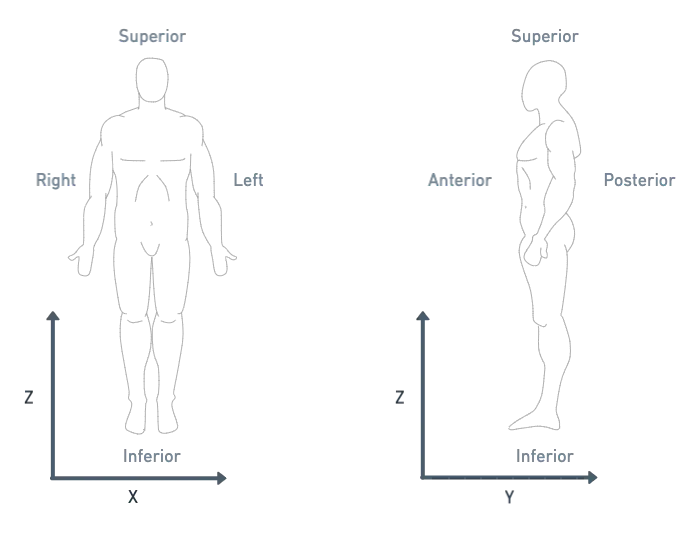

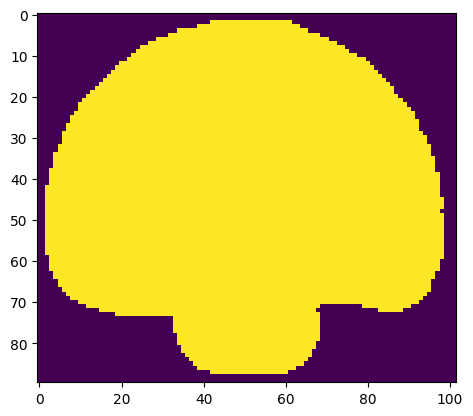

In [4]:
# Test get_mask_by_coordinates_and_image_shape
from Dosepy import bed
import matplotlib.pyplot as plt
import SimpleITK as sitk

coordinates = bed.get_structure_coordinates(
    "PTV_High",
    "/media/luis/TOMO/Dosepy/Hombro20en1/RS/RS.dcm"
)

dose = bed.load_dose("/media/luis/TOMO/Dosepy/Hombro20en1/RD_3D_arc1y2.dcm")

dose_2D = bed._get_dose_plane_by_coordinate(dose, 0)

mask = bed.get_2D_mask_by_coordinates_and_image_shape(coordinates[0], dose_2D)

plt.imshow(mask)

(array([2399., 2284.,  822.,  289.,  139.,   86.,   63.,   51.,   57.,
          69.]),
 array([ 0.44006874,  1.73552753,  3.03098632,  4.32644511,  5.6219039 ,
         6.91736269,  8.21282148,  9.50828027, 10.80373906, 12.09919785,
        13.39465664]),
 <BarContainer object of 10 artists>)

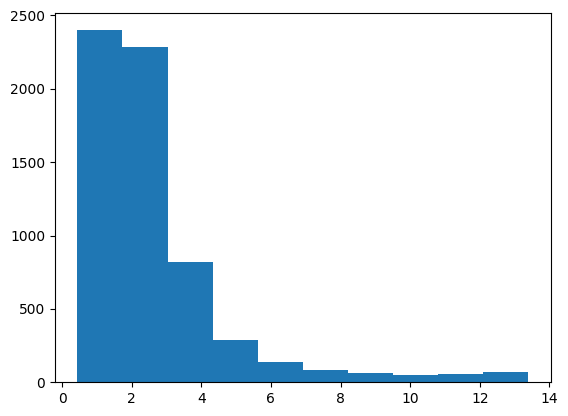

In [3]:
dose_array = sitk.GetArrayFromImage(dose_2D)[0,:,:]
plt.hist(dose_array[mask])

In [8]:
mask.shape

(90, 102)

In [5]:
import numpy as np
np.mean(mask)

np.float64(0.6818082788671024)

In [12]:
dose.GetSize()

(102, 90, 60)

# Test mask generation with a CT image

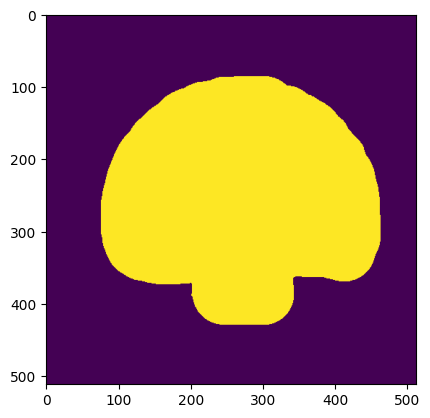

In [7]:
from Dosepy.bed import get_2D_mask_by_coordinates_and_image_shape

mask = get_2D_mask_by_coordinates_and_image_shape(coordinates[0], img)

plt.imshow(mask)

In [10]:
type(coordinates)

list